# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [3]:
df1 = pd.read_csv(r"C:\Users\anton\Ironhack\Week2\Day1\lab-customer-analysis-round-4\files_for_lab\csv_files\marketing_customer_analysis.csv")

In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [17]:
df1.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [32]:
#standarizing column headers
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.replace(' ','_')
df1.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [35]:
#put numerical coloumns in new dataframe numerical

numerical = df1.select_dtypes(include=np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [19]:
#put categorical coloumns in new dataframe categoricals

categoricals = df1.select_dtypes(include=np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


In [37]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

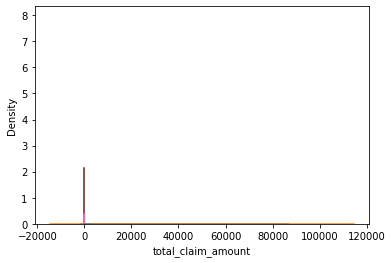

In [39]:
# tryin with a for loop to have less code, but is not really working, 
# is there a way to make a for loop and plot all single distribution plots for all the columns?
for numericals in numerical:
    sns.distplot(numerical[numericals])

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

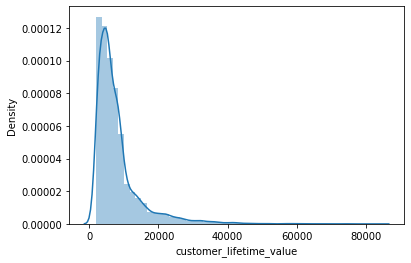

In [40]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["customer_lifetime_value"])

<AxesSubplot:xlabel='income', ylabel='Density'>

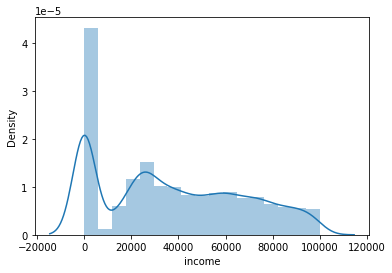

In [41]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["income"])

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

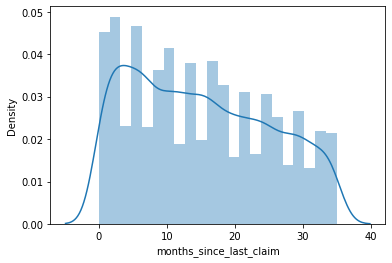

In [43]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["months_since_last_claim"])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

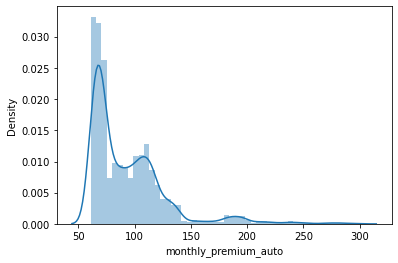

In [42]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["monthly_premium_auto"])

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

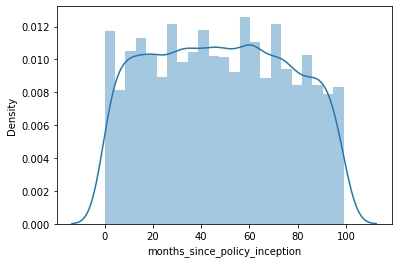

In [54]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["months_since_policy_inception"])

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

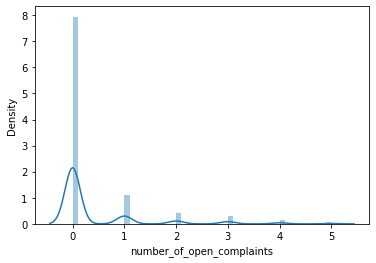

In [55]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["number_of_open_complaints"])

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

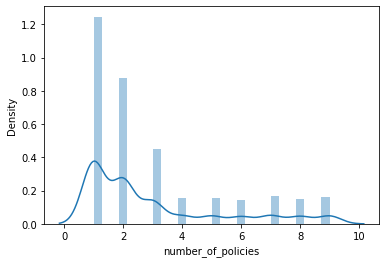

In [56]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["number_of_policies"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

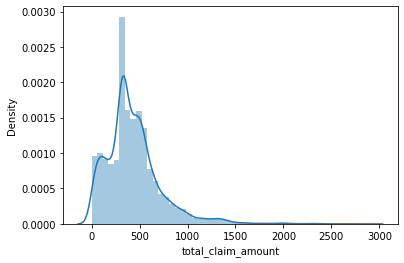

In [57]:
#using seaborn library to do distrbution plots for each columns seperately 
sns.distplot(numerical["total_claim_amount"])

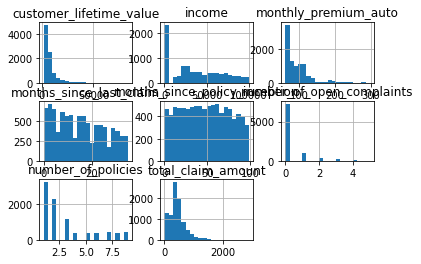

In [48]:
#plot histograms without matplotlib
#plt.figure(figsize=(500,500))
df1.hist(bins=20)
plt.show()

#How can I increase the size of the figures without listing all subplots like here in the example: ?
#fig, axs = plt.subplots(2, 2)

#axs[0, 0].hist(data['median_home_val'])
#axs[0, 1].hist(data['ic4'])
#axs[1, 0].hist(data['ic3'])
#axs[1, 1].hist(data['ic2'])

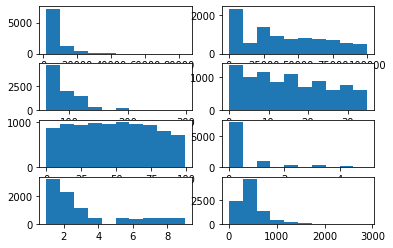

In [53]:
# plot histograms with matplotlib


fig, axs = plt.subplots(4,2) 

axs[0, 0].hist(df1['customer_lifetime_value'])
axs[0, 1].hist(df1['income'])
axs[1, 0].hist(df1['monthly_premium_auto'])
axs[1, 1].hist(df1['months_since_last_claim'])
axs[2, 0].hist(df1['months_since_policy_inception'])
axs[2, 1].hist(df1['number_of_open_complaints'])
axs[3, 0].hist(df1['number_of_policies'])
axs[3, 1].hist(df1['total_claim_amount'])
plt.show()


In [ ]:
#Do the distributions for different numerical variables look like a normal distribution
#No, none of them. Some more similiar than others but none of them look like a normal distribution

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore') 

#checking multicollinearity between the features 
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

# train the model
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:19:32   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# P value of 4 columns higher than 0.05 ->x therefore statistically not relevant?? Does this make sense?

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [61]:
#check for correlations

correlation_matrix = X.corr()
correlation_matrix

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,NaN,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,NaN,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,NaN,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,NaN,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,NaN,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,NaN,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,NaN,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


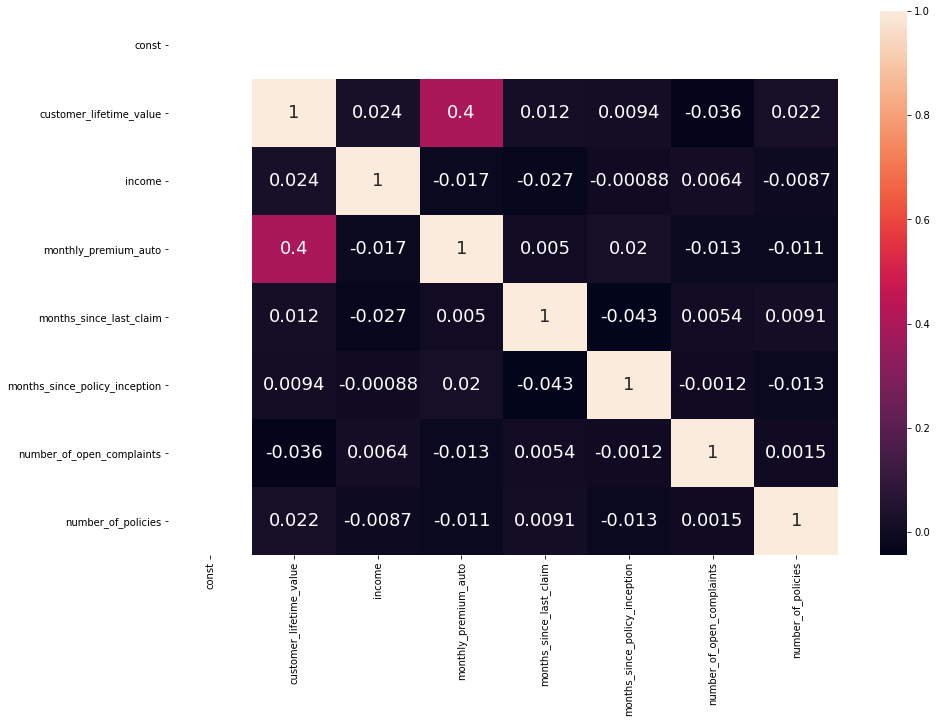

In [74]:
# plot seaborn heatmap
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(correlation_matrix, annot=True, annot_kws={"fontsize":18})
figure = sns_plot.get_figure()    
plt.show()

In [ ]:
# no correlation above 0.9 ->x no deletion 